In [1]:
## Importing relevant libraries

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature selection libraries
from sklearn.decomposition import PCA


# ML libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve


# Show all columns
pd.set_option('display.max_columns', None)

# Stop warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the dataset

data = pd.read_csv('Churn_Modelling.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**We have loaded the dataset, which contains a total of 491 records and 25 columns. Although most column has numerical values, this does not imply that all variables are numerical. For example, the column `HasCrCard` has values 0 and 1, representing categories. Thus, our dataset is a mix of categorical and numerical variables. We need to determine which columns are numerical and which are categorical by examining the definitions of each column.**

In [3]:
## Dataset Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**In the dataset information, we can see that 2 columns have float datatype, nine has integer datatype and 3 has object datatype.We can also see  that no columns has any missing values.**

In [4]:
## Defining categorical and numerical columns

cat_cols = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = data.columns.difference(cat_cols).to_list()

print(f'Total number of categorical columns: {len(cat_cols)}')
print(f'Total number of numerical columns: {len(num_cols)}')

Total number of categorical columns: 6
Total number of numerical columns: 8


**Now we will start the exploratory data analysis. The first step is defining the categorical and numerical variables. Variables such as `Surname`, `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `Exited` are classified as categorical variables. In contrast, any other variables that are not part of catergorical variables are classified as numerical variables i.e, `Age`,`Balance`,`EstimatedSalary` etc.**

In [5]:
## Data description for numerical columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00


**In the dataset description, we can see the numerical variables' descriptive analysis, including statistics like mean, standard deviation, minimum value, maximum value, and median values. There are no missing values. We can observe that the ranges of the columns are different, which may require scaling before using any ML model.**

In [6]:
## Data properties for categorical columns

for col in cat_cols:
    print(f'Column: {col} | Number of unique values: {data[col].nunique()}')

Column: Surname | Number of unique values: 2932
Column: Geography | Number of unique values: 3
Column: Gender | Number of unique values: 2
Column: HasCrCard | Number of unique values: 2
Column: IsActiveMember | Number of unique values: 2
Column: Exited | Number of unique values: 2


**For the categorical variables, we have identified the number of unique values. Most columns are binary, containing either 0 or 1 as values. However, the `Geography` variable has three distinct categories. Whereas `Surname` has 2932 unique values, we will need to deal with it later.**

In [7]:
## Checking if customer ID and RowNumber is unique for each customer

print(f'Number of rows in the dataset: {data.shape[0]}')

print(f'Number of unique customer IDs: {data["CustomerId"].nunique()}')
print(f'Number of unique RowNumbers: {data["RowNumber"].nunique()}')

Number of rows in the dataset: 10000
Number of unique customer IDs: 10000
Number of unique RowNumbers: 10000


**Now we have checked if each record in `customer ID` and `RowNumber` is unique or not. As we can see we have a total records of 10000 and our unique values are also 10000 ensuring each record is unique**

In [8]:
## Dropping the columns CustomerId, RowNumber and Surname

data.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)
cat_cols.remove('Surname')
num_cols.remove('CustomerId')
num_cols.remove('RowNumber')

data.shape

(10000, 11)

**We have dropped columns `Surname`,`CustomerId` and `RowNumber` as they have too many unqiue values in them to encode effectively and using them as it is or even after encoding will effect the performance of the model for worse.**

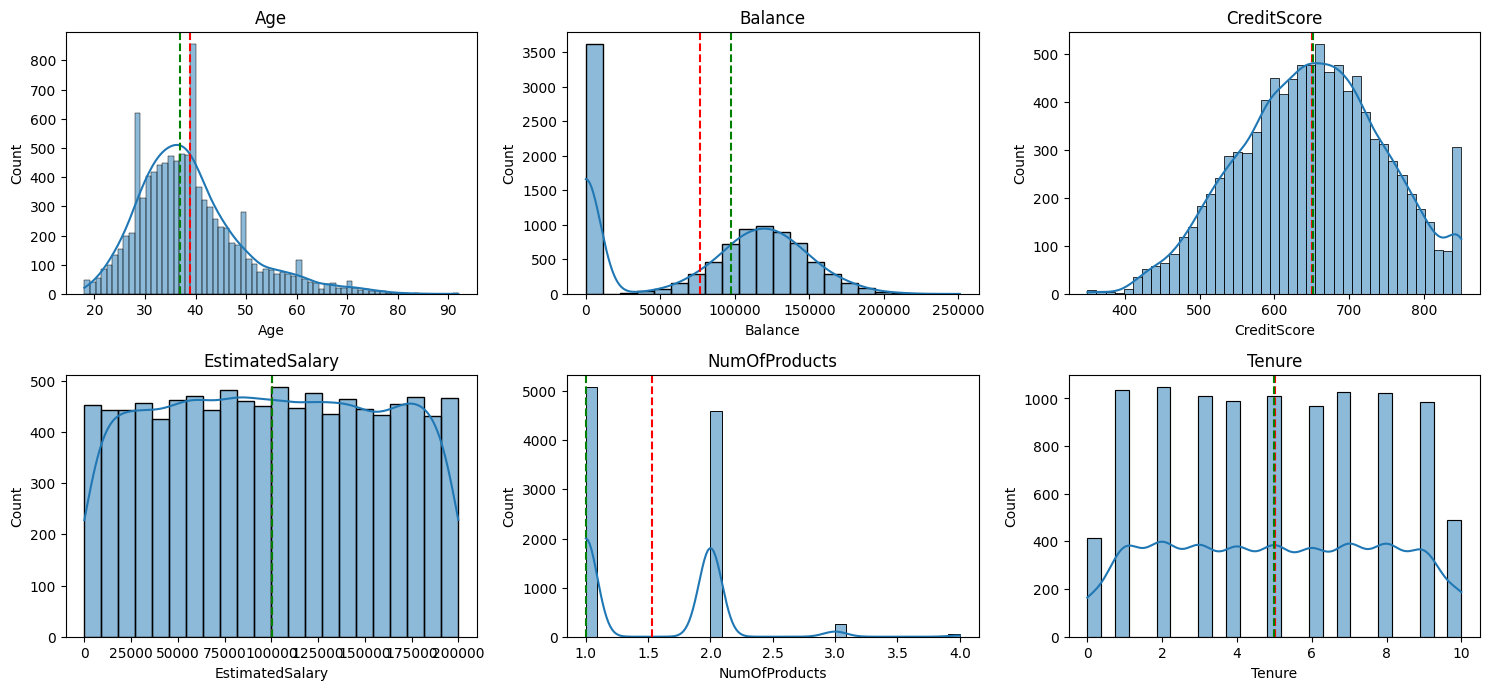

In [9]:
## Plotting distribution of numerical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.axvline(data[col].mean(), color='red', linestyle='--', label='mean')
    plt.axvline(data[col].median(), color='green', linestyle='--', label='median')
plt.tight_layout()
plt.show()

**This plot illustrates the distribution of numerical variables. Most columns exhibit a normal distribution with a bell-shaped curve, except for `EstimatedSalary` and `Tenure`, which shows a uniform distribution. However, aside from EstimatedSalary and NumOfProdcuts, most columns display a normal distribution.**

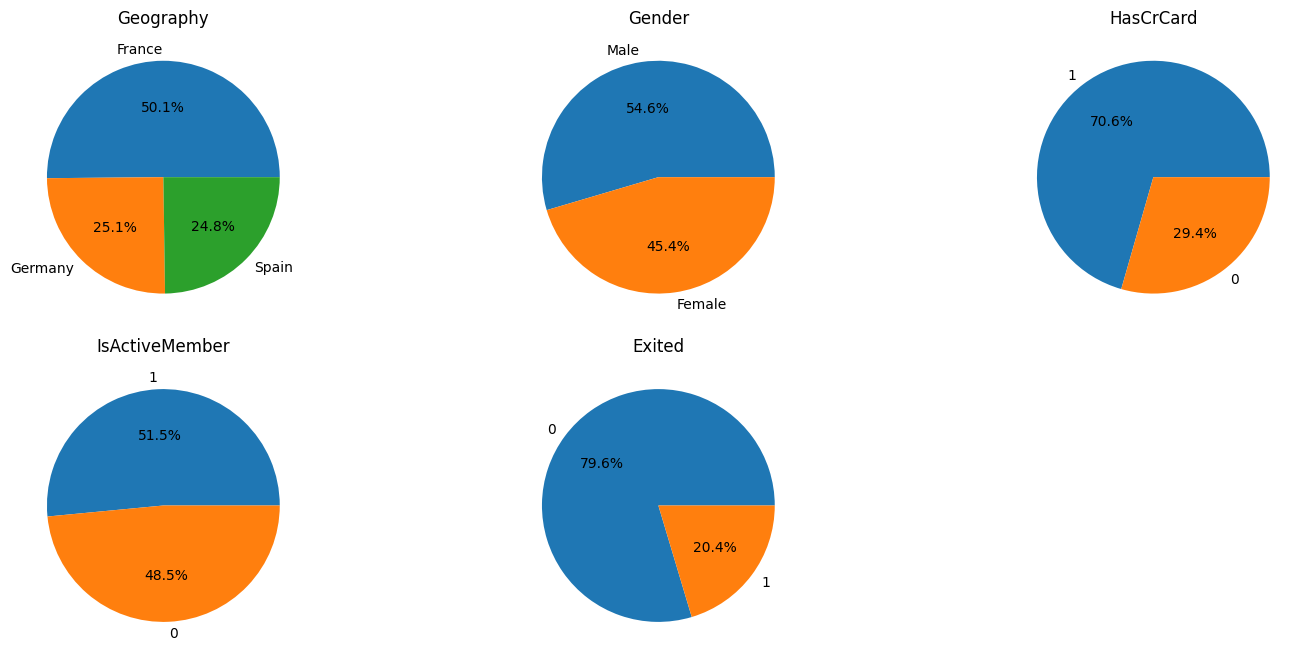

In [10]:
## Plotting the distribution of categorical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Similarly, this plot illustrates the distribution of categorical values, showing the percentage of different values in each categorical column. It reveals that `isActiveMember` is evenly distributed (almost 50-50). The `Gender` categorie also exhibit a uniform distribution with approximately equal proportions. However, some columns, such as `Exited`, `HasCrCard`, and `Geography`, display highly skewed distributions.**

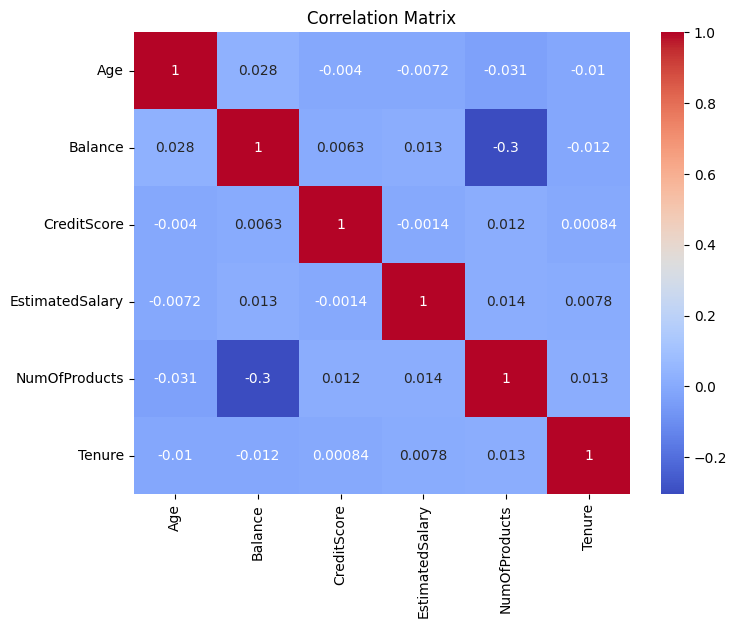

In [11]:
## Plotting the correlation matrix for numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrix represents the correlations between the numerical features. We observe that there are no strong positive correlations. The highest positive correlation observed is between `Age` and `Balance`, which is 0.02. Significant negative correlations include that between `NumOfProducts` and `Balance`, which is -0.3.**

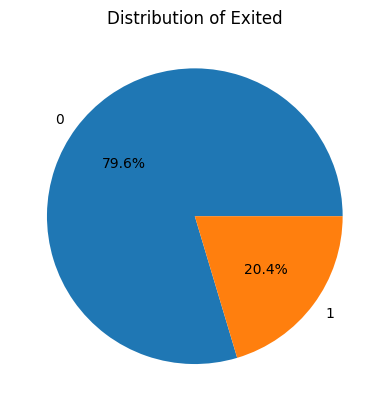

In [12]:
## Distribution of the target variable

target = 'Exited'
data[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Distribution of {target}')
plt.ylabel('')
plt.show()

**The pie chart above illustrates the distribution of the target variable, `Exited`. It shows that 20.4% of values are 1, indicating customers who have churn, while 79.6% of values are 0, indicating customers who havent churn. This highlights a significant imbalance in the dataset.**

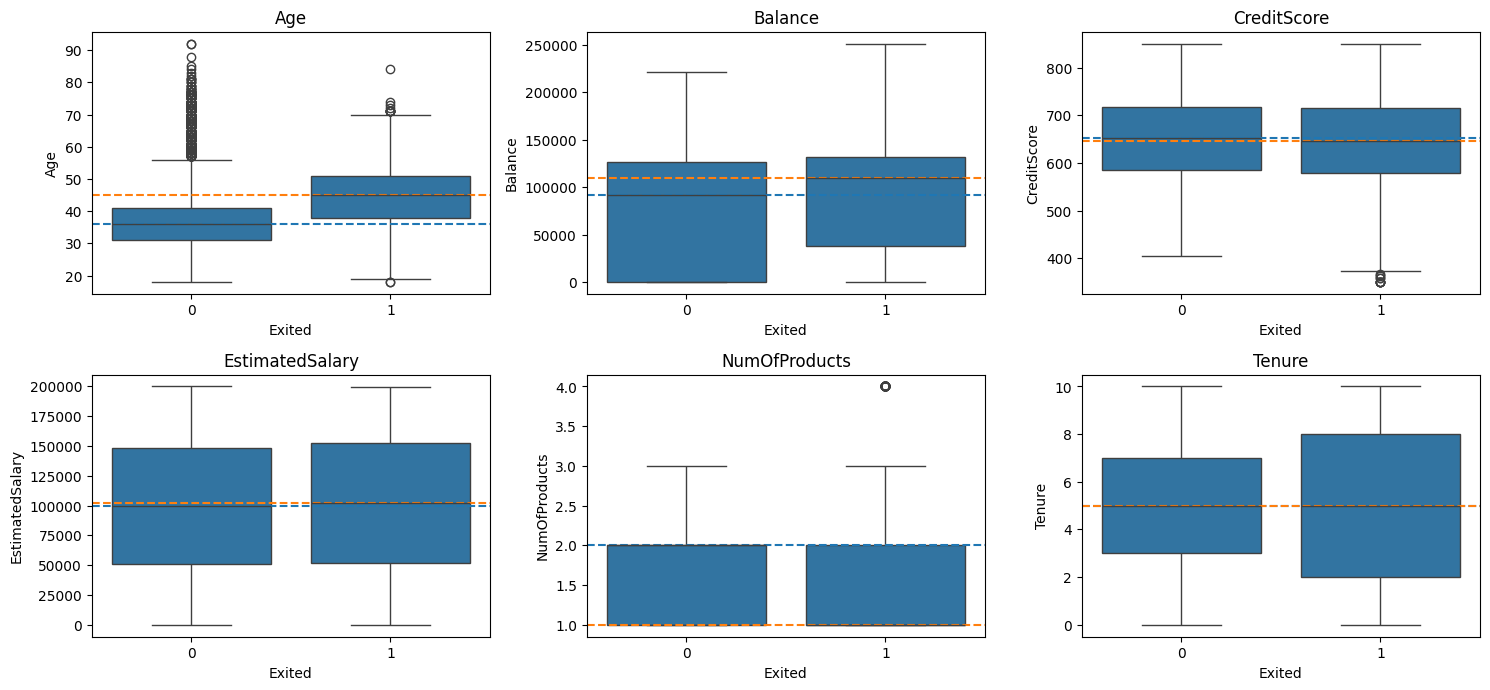

In [13]:
## Difference of distribution of numerical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=target, y=col, data=data)
    plt.title(col)
    ## adding median lines with same color as boxplot
    for j in range(2):
        line = plt.axhline(data[data[target] == j][col].median(), color=sns.color_palette()[j], linestyle='--', label=f'{target} = {j}')
plt.tight_layout()
plt.show()

**These subplots display the distribution of numerical columns when the class is 0 versus when the class is 1. We observe significant differences in some numerical values between the two classes, while others show minimal variation. For instance, columns like `NumOfProducts` and `Age` exhibit notable differences between class values 0 and 1. Conversely, columns such as `Estimated Salary` and `Credit Score` show less variation across the classes.We can also see that column `Tensure` has no difference at all.**

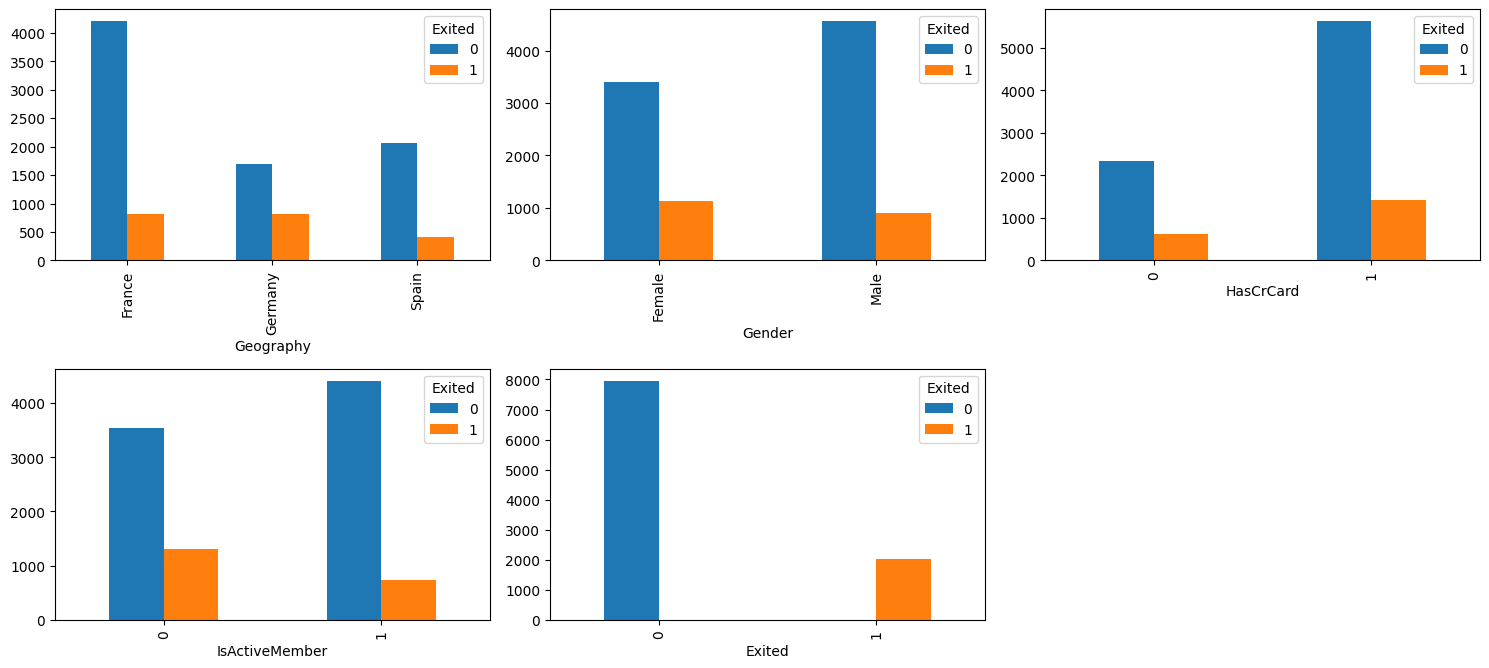

In [14]:
## Difference of distribution of categorical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    pd.crosstab(data[col], data[target]).plot(kind='bar', stacked=False, ax=plt.gca())
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Similarly, these subplots illustrate the distribution of categorical columns when the target variable Exited is 0 versus when it is 1. We observe similarities in behavior across both classes in many cases, but there are also noticeable differences. For example, columns such as `HasCrCard` exhibit distinct variations between Exited values 0 and 1.**

In [15]:
## Defining the features and target variable

X = data.drop(['Exited'], axis=1)
y = data['Exited']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (10000, 10)
Target shape: (10000,)


**Now we will start the data pre-processing. Before proceeding, we need to define the features and the target variable for the analysis. `Exited` has been removed from the features (X) as it is our target variable.**

In [16]:
## Encoding the categorical columns

# Convert the categorical columns to object type
cat_cols.remove('Exited')
X[cat_cols] = X[cat_cols].astype('object')

X = pd.get_dummies(X, drop_first=True)
print(f'Features shape after encoding: {X.shape}')
X.head()

Features shape after encoding: (10000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,False,False,False,True,True
1,608,41,1,83807.86,1,112542.58,False,True,False,False,True
2,502,42,8,159660.80,3,113931.57,False,False,False,True,False
3,699,39,1,0.00,2,93826.63,False,False,False,False,False
4,850,43,2,125510.82,1,79084.10,False,True,False,True,True


**After defining the features and target, we transform our categorical values into objects so that 0 and 1 are represented as classes rather than numerical values. Subsequently, we apply one-hot encoding to transform them into numerical format. This ensures each category has 10000 records. Since many columns are binary, there is not a substantial increase in the number of columns, except for one column that had three values initially, resulting in an additional column after one-hot encoding. Thus, we now have 10000 records and 11 columns.**

In [17]:
## Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')

Training features shape: (8000, 11)
Testing features shape: (2000, 11)


**Before proceeding with feature selection, we will split the dataset into training and testing sets. This ensures that every feature selection decision is influenced only by the training dataset and not by the test dataset.**

In [18]:
## Scaling the numerical columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1.367670,False,False,True,True,True
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1.661254,True,False,True,True,True
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,-0.252807,False,True,True,True,False
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.915393,False,False,False,True,False
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.059600,False,False,True,False,False


**As observed earlier, the ranges of each column were different. To ensure that no single column has a disproportionate impact on the model, we need to scale all variables. This process equalizes the influence of each column in the modeling process.**

Features shape after PCA: (8000, 9) | (2000, 9)


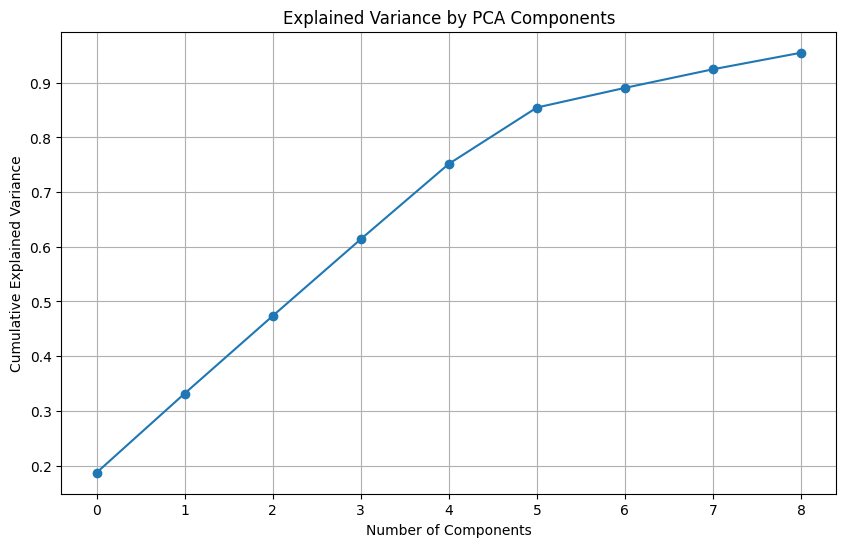

In [19]:
## PCA for feature selection



pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance
explained_variance = pca.explained_variance_ratio_

print(f'Features shape after PCA: {X_train_pca.shape} | {X_test_pca.shape}')

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

**For feature selection, we applied PCA independently on the raw dataset to reduce dimensionality, setting the explained variance threshold to 0.95. After feature reduction, the number of columns was reduced to 9.**

**PCA (Principal Component Analysis) works by transforming correlated variables into a set of orthogonal components that capture the maximum variance in the data. It reduces dimensionality while retaining most of the information, handling collinearity, and focusing on the most significant features.**

**The plot above illustrates the explained variance ratio increase as the number of components increases. We observe that the explained variance ratio reaches 0.95 with 9 components.**

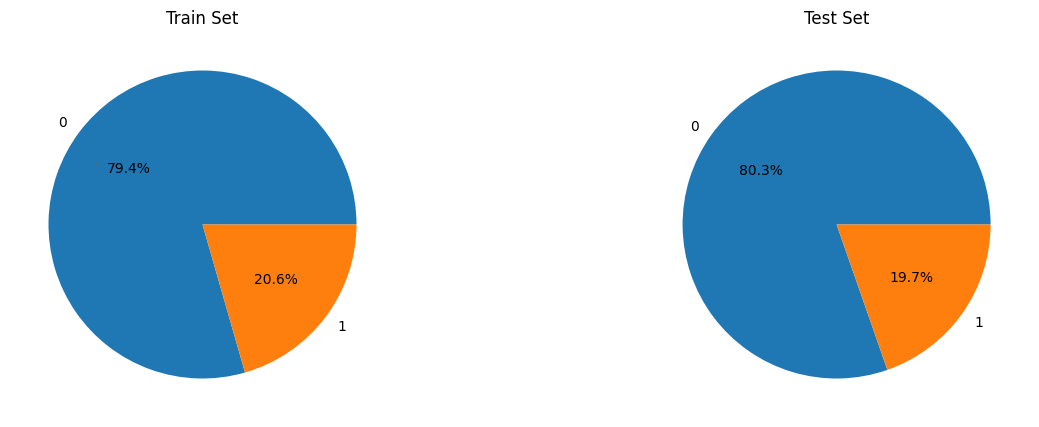

In [20]:
## Plotting the distribution of the target variable

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set')
plt.ylabel('')

plt.subplot(1, 2, 2)
y_test.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Test Set')
plt.ylabel('')
plt.show()

**This is a comparative analysis of the distribution of the target variable in the train set and the test set. By using `stratify=y` during splitting, we ensured that the distribution remains consistent between both datasets.**

In [21]:
## DataFrame to store the results

results = pd.DataFrame(columns=['Model', 'PCA', 'Train Accuracy', 'Test Accuracy','Train F1 Score',
                                'Test F1 Score', 'Test Precision', 'Test Recall', 'Test ROC AUC'])

**Now, with the various data variants, we can begin evaluating different models and dataset versions. We have created a DataFrame to hold the performance metrics for each model with or withour PCA.**

In [22]:
## function to search for the best hyperparameters

def search_best_hyperparameters(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'Best Parameters: {grid.best_params_}')
    print(f'Best Score: {np.round(grid.best_score_, 2)}')
    print(f'Best Estimator: {grid.best_estimator_}')
    return grid.best_estimator_

**This function helps us find the best combination or optimal parameters for a particular model using GridSearch.**

**GridSearch is a technique that performs an exhaustive search over a predefined parameter grid, training the model for each combination of hyperparameters and evaluating performance using cross-validation to identify the optimal set.**

In [23]:
## Logistic Regression - Hyperparameter Tuning on different datasets

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

print('Logistic Regression - Using all features')
lr1 = LogisticRegression(random_state=42)
lr1_best = search_best_hyperparameters(lr1, params, X_train, y_train)

print('\nLogistic Regression - Using PCA features')
lr2 = LogisticRegression(random_state=42)
lr2_best = search_best_hyperparameters(lr2, params, X_train_pca, y_train)

Logistic Regression - Using all features
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.81
Best Estimator: LogisticRegression(C=10, random_state=42)

Logistic Regression - Using PCA features
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.81
Best Estimator: LogisticRegression(C=1, random_state=42)


**Optimal combinations of hyperparameters were searched for logistic regression across both dataset variants. First, we tried logistic regression with all features, then used only the selected features obtained through PCA. The scores and best parameters for both variants of logistic regression are displayed above.**

In [24]:
## function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy, train_f1, test_f1, test_precision, test_recall, test_roc_auc

**This function helps us train and evaluate the particular model with best combination or optimal parameters for that particular model obtained using GridSearch.**

Logistic Regression - Using all features


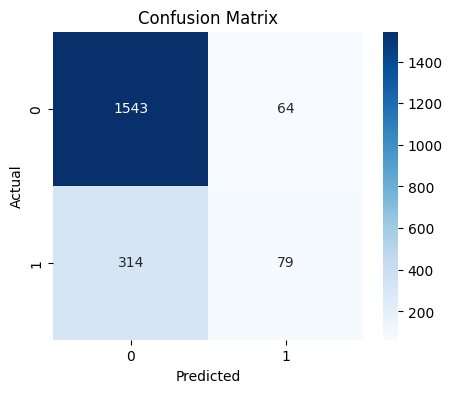

Logistic Regression - Using PCA features


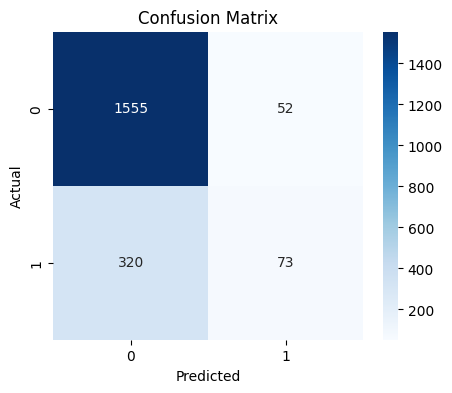

,Model,PCA,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
0,Logistic Regression,No,0.811250,0.811,0.322262,0.294776,0.552448,0.201018,0.580596
1,Logistic Regression,Yes,0.809375,0.814,0.294961,0.281853,0.584000,0.185751,0.576696


In [25]:
## Logistic Regression - Training and Testing Optimal Models on different datasets
print('Logistic Regression - Using all features')
results.loc[len(results)] = ['Logistic Regression', 'No'] + list(evaluate_model(lr1_best, X_train, y_train, X_test, y_test))
print('Logistic Regression - Using PCA features')
results.loc[len(results)] = ['Logistic Regression', 'Yes'] + list(evaluate_model(lr2_best, X_train_pca, y_train, X_test_pca, y_test))

results[results['Model'] == 'Logistic Regression']

**Both optimal variants were evaluated on the test data, and the results are displayed in the table above.**

In [26]:
## K-Nearest Neighbors - Hyperparameter Tuning on different datasets

params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

print('K-Nearest Neighbors - Using all features')
knn1 = KNeighborsClassifier()
knn1_best = search_best_hyperparameters(knn1, params, X_train, y_train)

print('\nK-Nearest Neighbors - Using PCA features')
knn2 = KNeighborsClassifier()
knn2_best = search_best_hyperparameters(knn2, params, X_train_pca, y_train)

K-Nearest Neighbors - Using all features
Best Parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best Score: 0.85
Best Estimator: KNeighborsClassifier(n_neighbors=11)

K-Nearest Neighbors - Using PCA features
Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Score: 0.85
Best Estimator: KNeighborsClassifier(n_neighbors=9)


K-Nearest Neighbors - Using all features


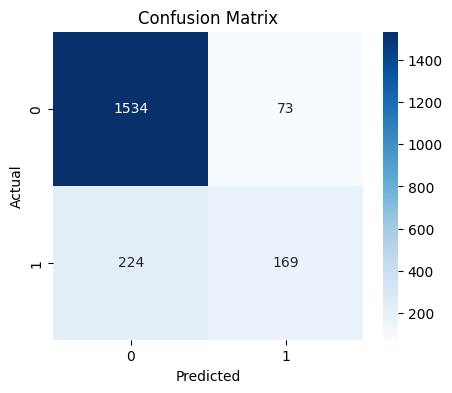

K-Nearest Neighbors - Using PCA features


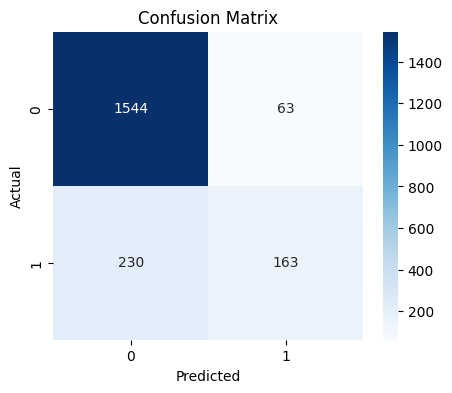

,Model,PCA,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
2,K-Nearest Neighbors,No,0.865625,0.8515,0.588595,0.532283,0.698347,0.430025,0.692300
3,K-Nearest Neighbors,Yes,0.867750,0.8535,0.594946,0.526656,0.721239,0.414758,0.687777


In [27]:
## K-Nearest Neighbors - Training and Testing Optimal Models on different datasets
print('K-Nearest Neighbors - Using all features')
results.loc[len(results)] = ['K-Nearest Neighbors', 'No'] + list(evaluate_model(knn1_best, X_train, y_train, X_test, y_test))
print('K-Nearest Neighbors - Using PCA features')
results.loc[len(results)] = ['K-Nearest Neighbors', 'Yes'] + list(evaluate_model(knn2_best, X_train_pca, y_train, X_test_pca, y_test))

results[results['Model'] == 'K-Nearest Neighbors']

**Similarly, for KNN, the optimal hyperparameters were first identified. The models were then trained and tested with these optimal hyperparameters across all seven variants of the training and test datasets.**

In [28]:
## Decision Tree - Hyperparameter Tuning on different datasets

params = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}

print('Decision Tree - Using all features')
dt1 = DecisionTreeClassifier(random_state=42)
dt1_best = search_best_hyperparameters(dt1, params, X_train, y_train)

print('\nDecision Tree - Using PCA features')
dt2 = DecisionTreeClassifier(random_state=42)
dt2_best = search_best_hyperparameters(dt2, params, X_train_pca, y_train)

Decision Tree - Using all features
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.85
Best Estimator: DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

Decision Tree - Using PCA features
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.84
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)


Decision Tree - Using all features


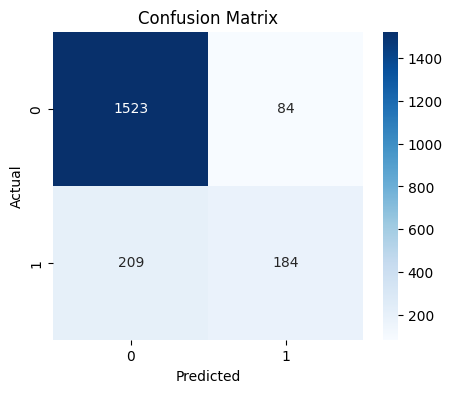

Decision Tree - Using PCA features


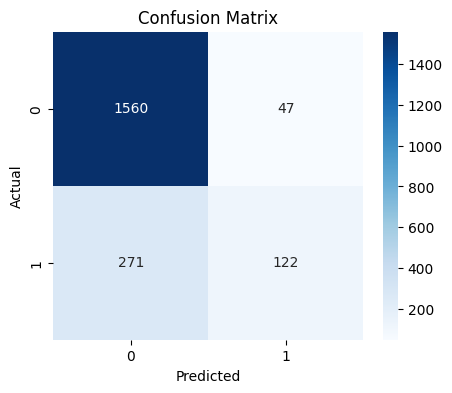

,Model,PCA,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
4,Decision Tree,No,0.872625,0.8535,0.625780,0.556732,0.686567,0.468193,0.707961
5,Decision Tree,Yes,0.847375,0.8410,0.486327,0.434164,0.721893,0.310433,0.640593


In [29]:
## Decision Tree - Training and Testing Optimal Models on different datasets

print('Decision Tree - Using all features')
results.loc[len(results)] = ['Decision Tree', 'No'] + list(evaluate_model(dt1_best, X_train, y_train, X_test, y_test))
print('Decision Tree - Using PCA features')
results.loc[len(results)] = ['Decision Tree', 'Yes'] + list(evaluate_model(dt2_best, X_train_pca, y_train, X_test_pca, y_test))

results[results['Model'] == 'Decision Tree']

**The third model was DecisionTree, which was optimized based on `max_depth`, `min_samples_split`, and `min_samples_leaf`. The model was then trained and tested with these optimized parameters.**

In [30]:
## Random Forest - Hyperparameter Tuning on different datasets

params = {'n_estimators': [100, 250, 500], 'max_depth': [3, 5, 8], 'min_samples_split': [2, 5, 10]}

print('Random Forest - Using all features')
rf1 = RandomForestClassifier(random_state=42)
rf1_best = search_best_hyperparameters(rf1, params, X_train, y_train)

print('\nRandom Forest - Using PCA features')
rf2 = RandomForestClassifier(random_state=42)
rf2_best = search_best_hyperparameters(rf2, params, X_train_pca, y_train)

Random Forest - Using all features
Best Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 250}
Best Score: 0.86
Best Estimator: RandomForestClassifier(max_depth=8, n_estimators=250, random_state=42)

Random Forest - Using PCA features
Best Parameters: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 250}
Best Score: 0.85
Best Estimator: RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=250,
                       random_state=42)


Random Forest - Using all features


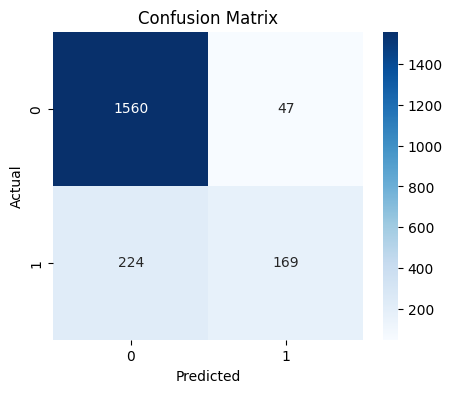


Random Forest - Using PCA features


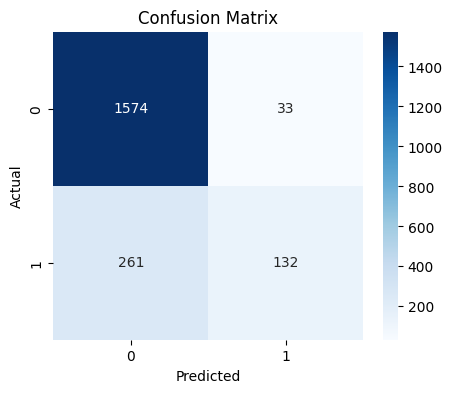

,Model,PCA,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
6,Random Forest,No,0.880125,0.8645,0.615939,0.555008,0.782407,0.430025,0.700389
7,Random Forest,Yes,0.873875,0.8530,0.576228,0.473118,0.800000,0.335878,0.657671


In [31]:
## Random Forest - Training and Testing Optimal Models on different datasets

print('Random Forest - Using all features')
results.loc[len(results)] = ['Random Forest', 'No'] + list(evaluate_model(rf1_best, X_train, y_train, X_test, y_test))
print('\nRandom Forest - Using PCA features')
results.loc[len(results)] = ['Random Forest', 'Yes'] + list(evaluate_model(rf2_best, X_train_pca, y_train, X_test_pca, y_test))

results[results['Model'] == 'Random Forest']

**The same process was applied to Random Forest, optimizing hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`.**

In [32]:
## Results

results.to_csv('results.csv', index=False)
results

,Model,PCA,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
0,Logistic Regression,No,0.811250,0.8110,0.322262,0.294776,0.552448,0.201018,0.580596
1,Logistic Regression,Yes,0.809375,0.8140,0.294961,0.281853,0.584000,0.185751,0.576696
2,K-Nearest Neighbors,No,0.865625,0.8515,0.588595,0.532283,0.698347,0.430025,0.692300
3,K-Nearest Neighbors,Yes,0.867750,0.8535,0.594946,0.526656,0.721239,0.414758,0.687777
4,Decision Tree,No,0.872625,0.8535,0.625780,0.556732,0.686567,0.468193,0.707961
5,Decision Tree,Yes,0.847375,0.8410,0.486327,0.434164,0.721893,0.310433,0.640593
6,Random Forest,No,0.880125,0.8645,0.615939,0.555008,0.782407,0.430025,0.700389
7,Random Forest,Yes,0.873875,0.8530,0.576228,0.473118,0.800000,0.335878,0.657671


**The table above comprehensively compares different models with and without PCA. It includes training accuracy, test accuracy, training F1 score, test F1 score, test precision, test recall, and test ROC AUC scores. We will now visually represent this data to obtain a clearer understanding and comparison.**

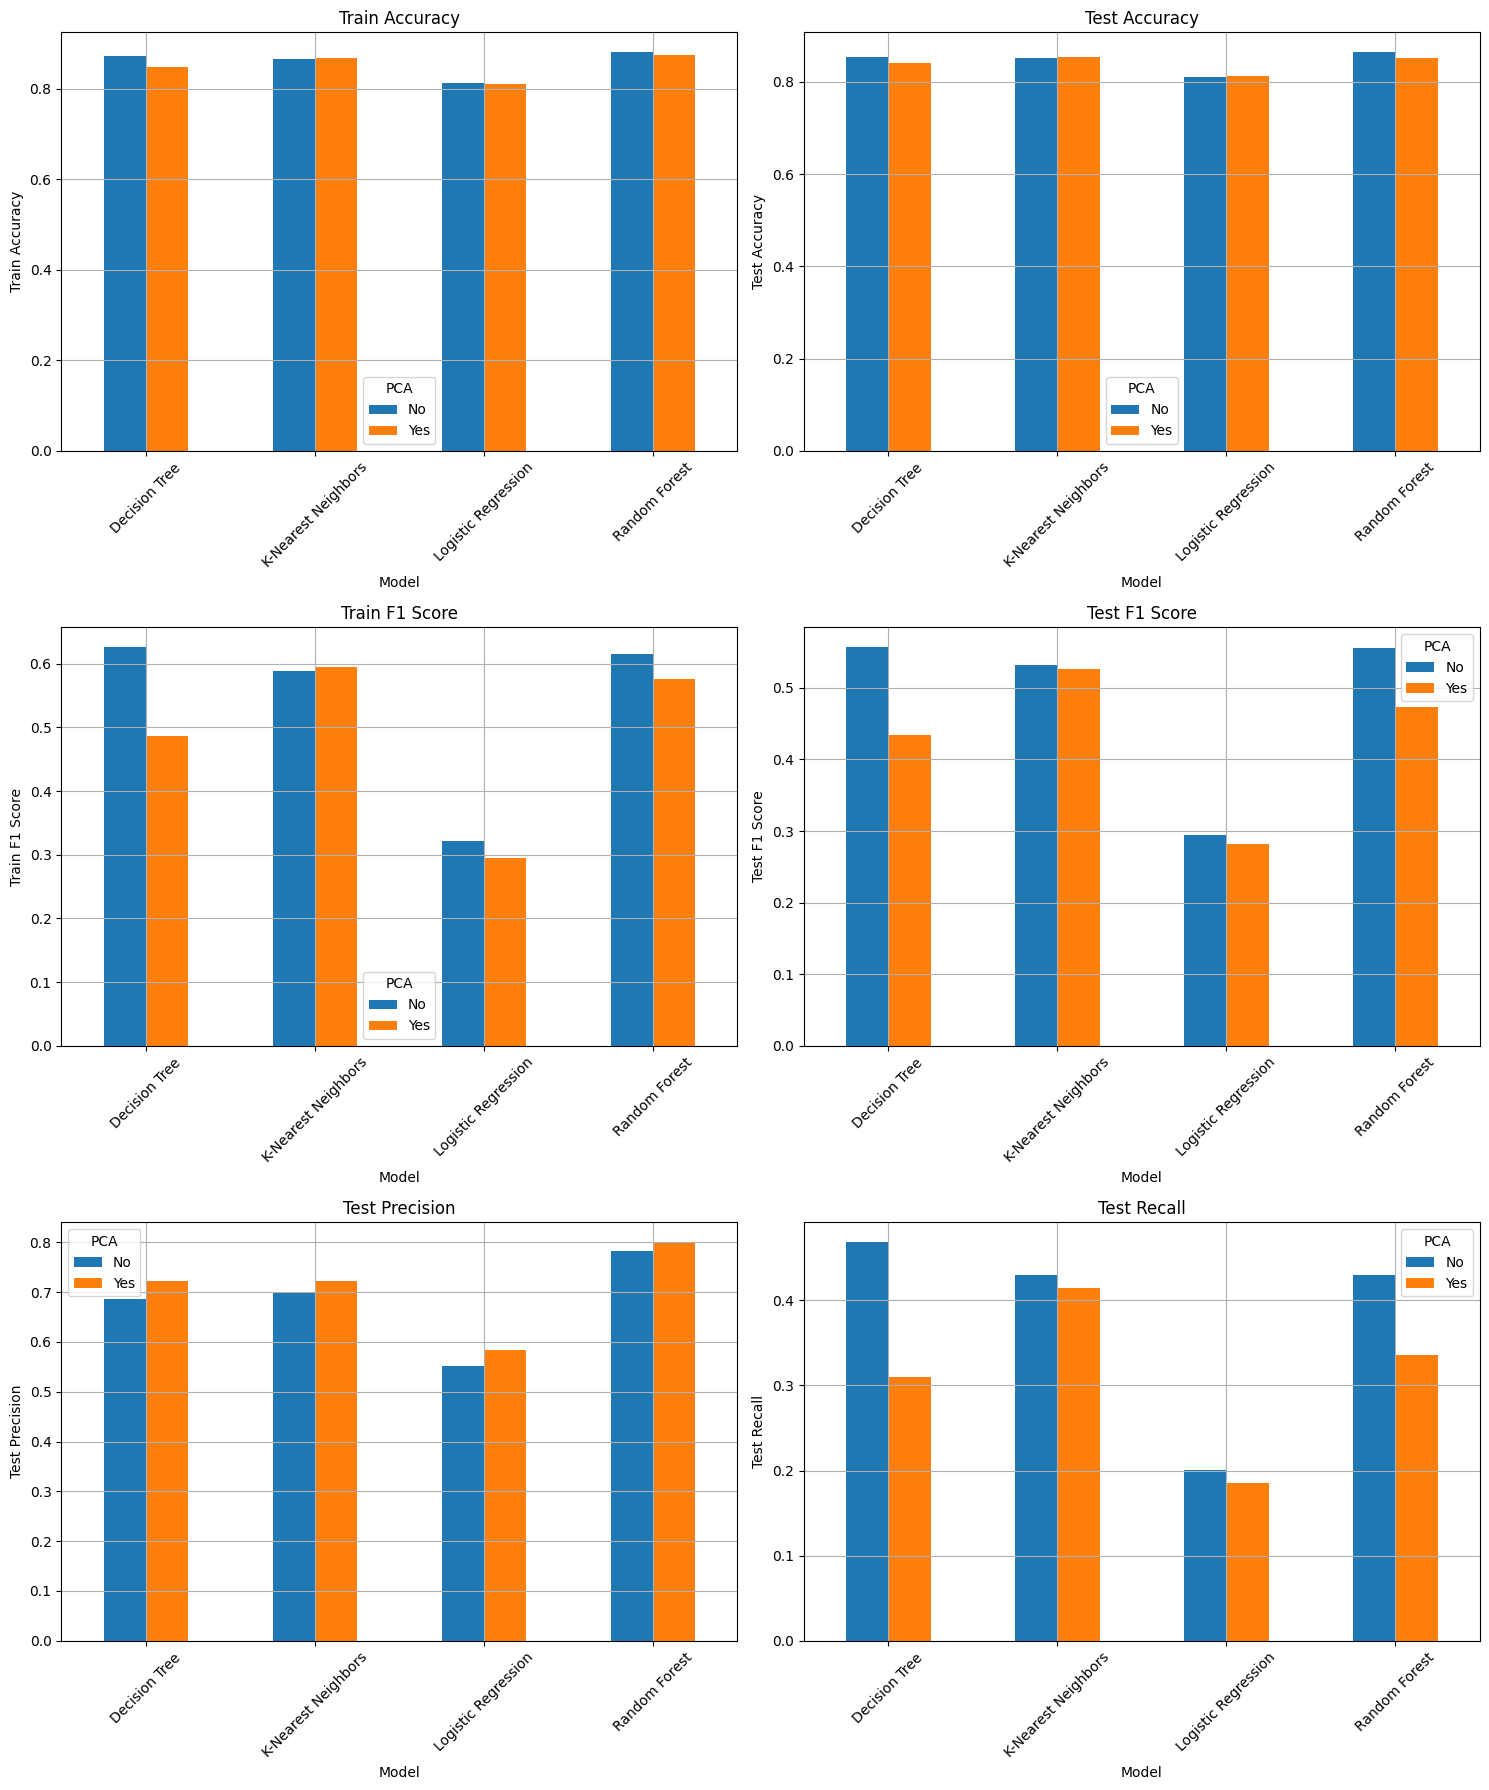

In [33]:
# Create subplots for each performance metric
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    
    # Pivot the data for the current metric
    pivot_df = results.pivot(index='Model', columns='PCA', values=metric)
    
    # Plotting
    pivot_df.plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.legend(title='PCA')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**The charts above display all the metrics, including train accuracy, test accuracy, train F1 score, test F1 score, test precision, and test recall, for all models across all dataset variants. This visualization helps us choose the optimal model for our machine learning implementation.**

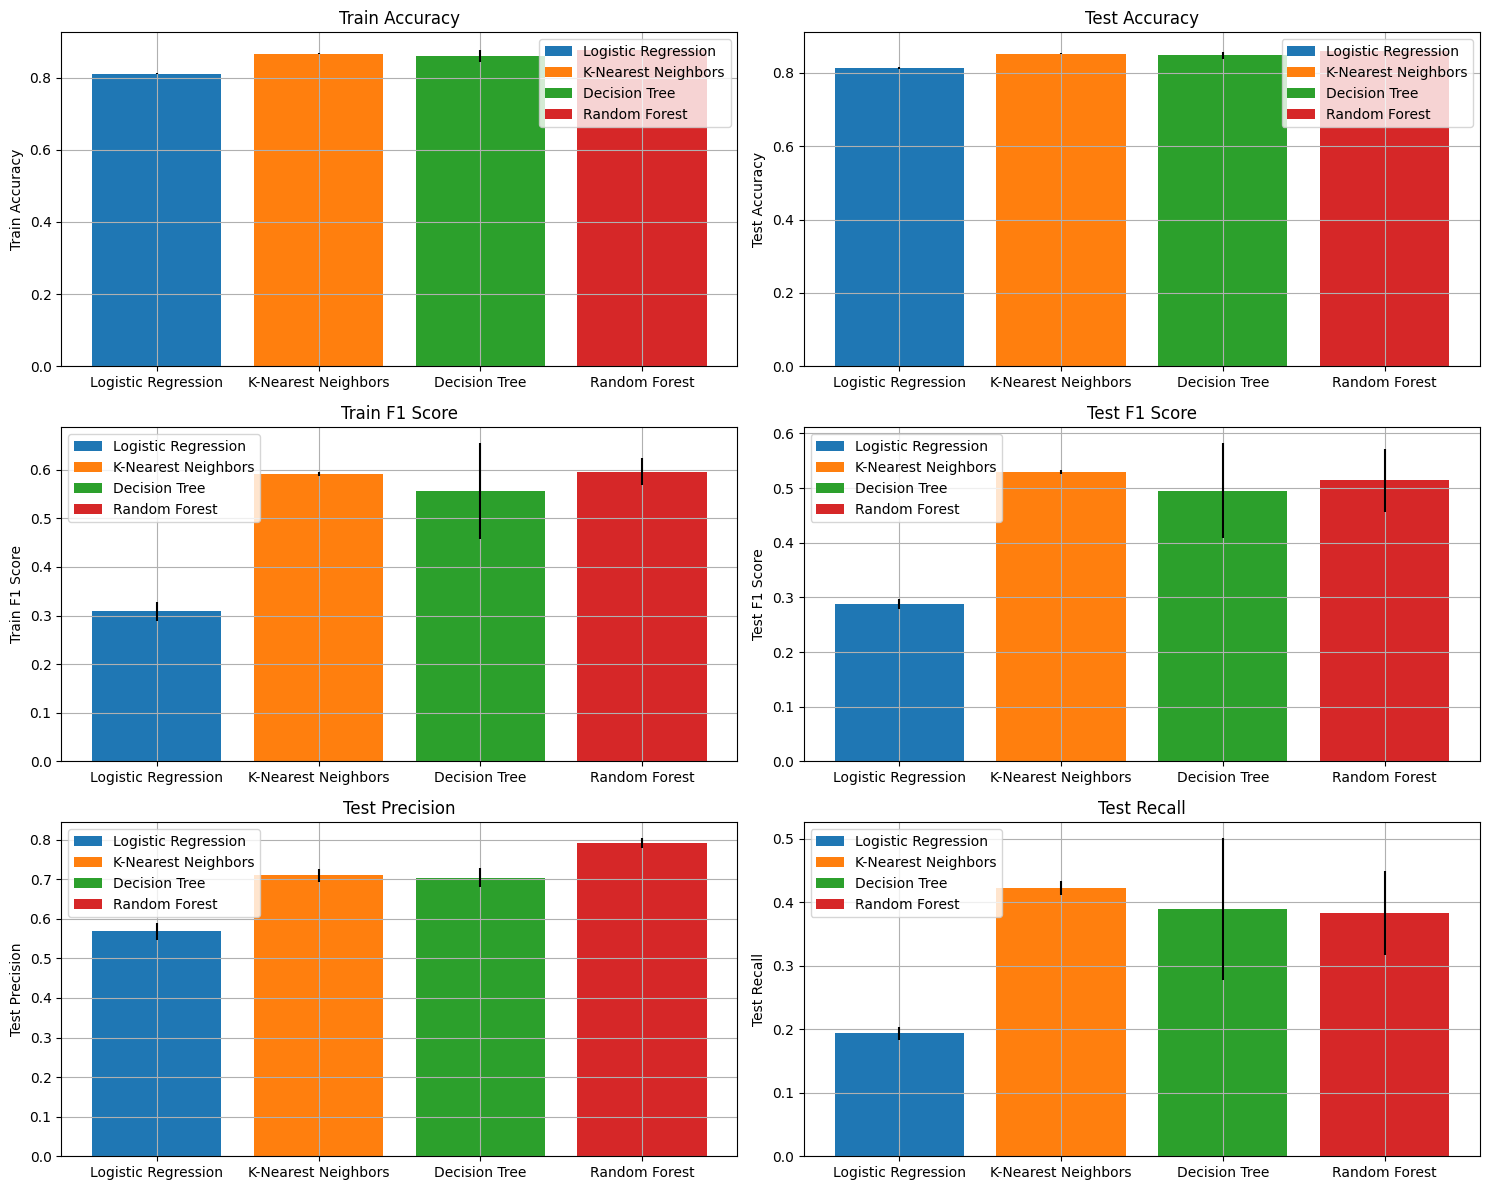

In [34]:
## Plot average performance metrics for each model

# Create subplots for each performance metric
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for model in results['Model'].unique():
        model_data = results[results['Model'] == model]
        ax.bar(model, model_data[metric].mean(), yerr=model_data[metric].std(), label=model)
    
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

**These bar charts represent the average performances of the models across different evaluation metrics on the test data. This visualization focuses solely on comparing how models performed without distinguishing between balancing techniques and feature selection techniques.**

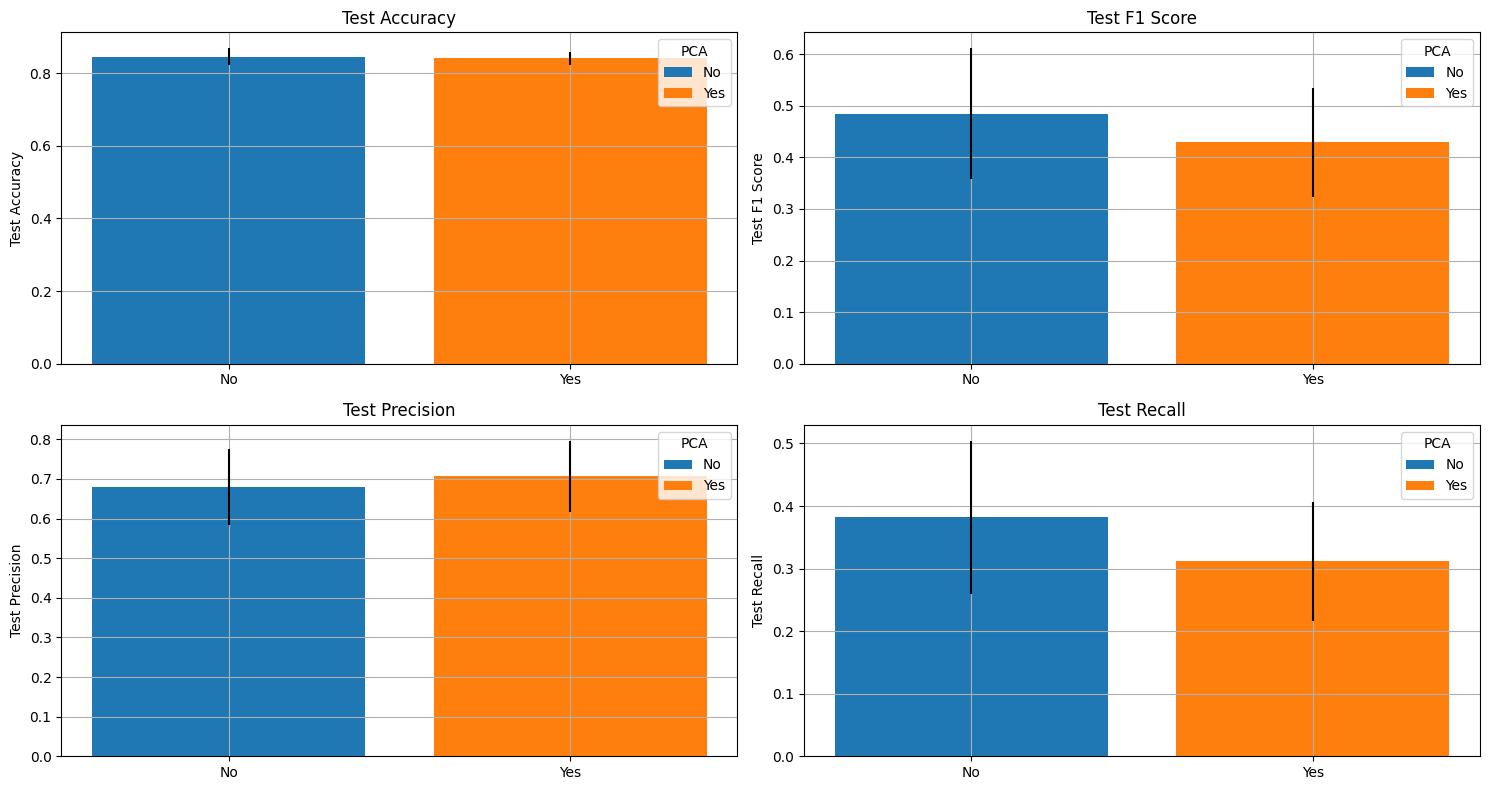

In [35]:
## Average performance metrics for each feature selection technique

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

metrics = ['Test Accuracy', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for fs in results['PCA'].unique():
        fs_data = results[results['PCA'] == fs]
        ax.bar(fs, fs_data[metric].mean(), yerr=fs_data[metric].std(), label=fs)
    
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.legend(title='PCA')
    ax.grid(True)

plt.tight_layout()
plt.show()


**These plots illustrate how models performed with different feature selection techniques, allowing us to compare the relative performance of each technique.**

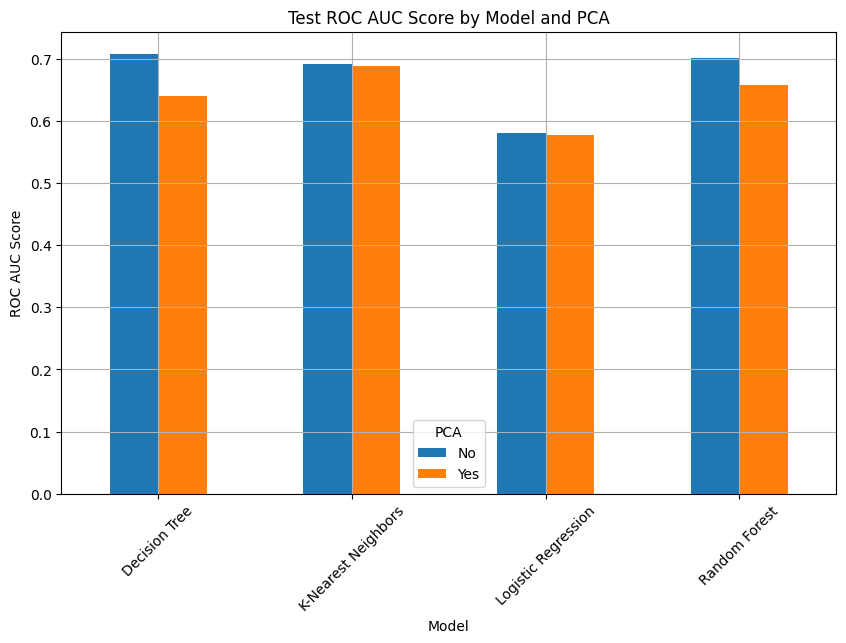

In [36]:
## Plotting ROC Score for each model
pivot_df = results.pivot(index='Model', columns='PCA', values='Test ROC AUC')
# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Test ROC AUC Score by Model and PCA')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=45)
plt.legend(title='PCA')
plt.grid(True)
plt.show()

**We can observe the comparison of ROC-AUC test scores, showing that logistic regression outperforms other models significantly in terms of test ROC-AUC score.**

In [37]:
## Training Optimal Model: Random Forest - No PCA

best_model = RandomForestClassifier(max_depth=8, n_estimators=250, random_state=42)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

test_roc_auc = roc_auc_score(y_test, y_test_pred)

print('Model Evaluation Metrics:')
print(f'Train Accuracy: {np.round(train_accuracy, 2)} | Test Accuracy: {np.round(test_accuracy, 2)}')
print(f'Train F1 Score: {np.round(train_f1, 2)} | Test F1 Score: {np.round(test_f1, 2)}')
print(f'Test Precision: {np.round(test_precision, 2)}')
print(f'Test Recall: {np.round(test_recall, 2)}')
print(f'Test ROC AUC: {np.round(test_roc_auc, 2)}')

Model Evaluation Metrics:
Train Accuracy: 0.88 | Test Accuracy: 0.86
Train F1 Score: 0.62 | Test F1 Score: 0.56
Test Precision: 0.78
Test Recall: 0.43
Test ROC AUC: 0.7


**The model achieves high accuracy scores on both training and test datasets, indicating that it generalizes well to unseen data.**

**The F1 score, which balances precision and recall, shows a reasonable performance, indicating that the model is effective in correctly identifying positive cases (Churn) while maintaining a balance between precision and recall. The model exhibits high precision (0.78), meaning that when it predicts churn, it is correct 78% of the time. The recall (0.43) suggests that the model correctly identifies 43% of all actual churn cases.**

**The ROC AUC score of 0.70 indicates that the model performs reasonably well in distinguishing between positive and negative cases.**

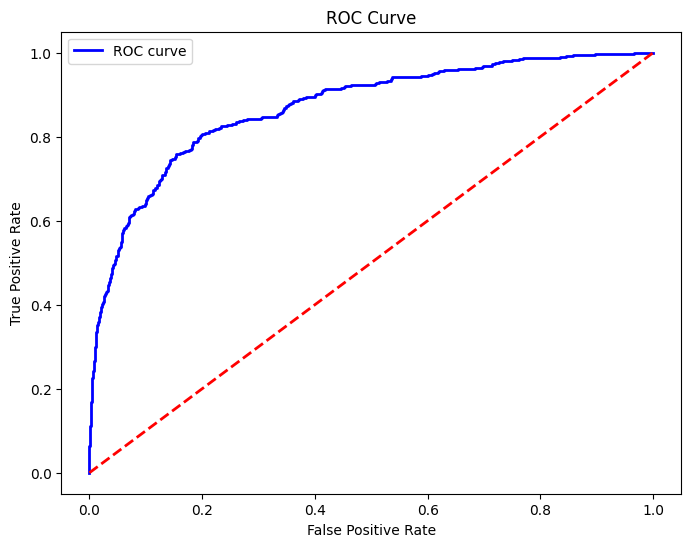

In [38]:
## Plotting the ROC Curve

# Get the probabilities for each class
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**This plot displays the ROC-AUC curve on the test data. The ROC curve illustrates how well the model distinguishes between positive and negative cases by plotting the True Positive Rate against the False Positive Rate at different threshold settings. A higher ROC AUC score indicates better overall performance of the model in classification tasks.**

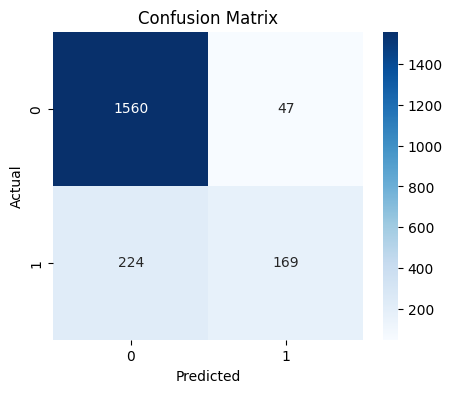

In [39]:
## Plot Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Based on the provided confusion matrix:**

- **True Negatives (TN): 1560 records were correctly predicted as false.**
- **True Positives (TP): 169 records were correctly predicted as true.**
- **False Positives (FP): 47 actual false record was incorrectly predicted as true.**
- **False Negatives (FN): 224 true positive records were incorrectly predicted as false.**

**This confusion matrix provides a breakdown of how the model's predictions align with the actual outcomes across binary classes, highlighting the correct and incorrect predictions of true and false instances.**